In [38]:
import os
import time
import csv
import numpy as np

import torch
import torch.nn.parallel
import torch.optim
import models
import utils
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
checkpoint = torch.load('./mobilenet-nnconv5dw-skipadd-pruned.pth.tar',map_location=torch.device('cpu'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.batch

In [33]:
if type(checkpoint) is dict:
    start_epoch = checkpoint['epoch']
    best_result = checkpoint['best_result']
    model = checkpoint['model']
else:
    start_epoch = 0
    model = checkpoint

In [41]:
def loadimg(filepath):
    img = Image.open(filepath).convert('RGB').resize((224,224),Image.NEAREST)
    img = np.asarray(img).astype('float')
    img /= 255.0
    img = np.expand_dims(img,axis=0)
    img = np.transpose(img, (0,3, 1, 2))
    return torch.from_numpy(img).float().to('cpu')

In [100]:
img = loadimg('./examples/IMG_2148.png')

In [101]:
with torch.no_grad():
    pred = model(img)

In [102]:
pred[0][0]

tensor([[3.5258, 3.5258, 3.6983,  ..., 3.8828, 3.6898, 3.6898],
        [3.5258, 3.5258, 3.6983,  ..., 3.8828, 3.6898, 3.6898],
        [3.7566, 3.7566, 3.9093,  ..., 3.9652, 3.8504, 3.8504],
        ...,
        [2.6081, 2.6081, 2.6816,  ..., 2.5894, 2.4563, 2.4563],
        [2.4620, 2.4620, 2.5810,  ..., 2.4952, 2.2557, 2.2557],
        [2.4620, 2.4620, 2.5810,  ..., 2.4952, 2.2557, 2.2557]])

In [103]:
result = pred[0][0].numpy()

In [104]:
np.min(result)

2.255655

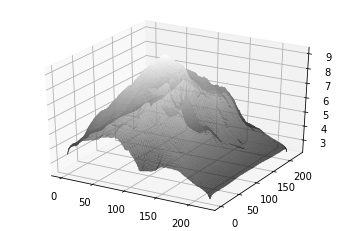

In [105]:
from mpl_toolkits.mplot3d import Axes3D
# generate some sample data
import scipy.misc


# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:result.shape[0], 0:result.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, result ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()